
<div style="text-align:left;font-size: 0.8em; color: #444;line-height: 0.9;font-family: Palatino;">  
<strong>NOTE:</strong>  This notebook, provided under the terms of the MIT licensing, demonstrates the usage of CARTMAN functions. For the most up-to-date version of this document and the CARTMAN tool, please visit <a href="https://github.com/psaisan/CARTMAN"> github.com/psaisan/CARTMAN </a>.
<hr>
</div>
<div style="background-color: #FFE; border: 1px solid #333333; padding: 10px; font-size: 0.80em; font-family: 'Libre Baskerville', serif; text-align: left;">
 
<h1>
CARTMAN Analysis of Motif Co-occurences in Active Peaks of Healthy vs. Diseased Kupffer Cells</h1>    
</div>

<br>   

As outlined in  <a href="https://pubmed.ncbi.nlm.nih.gov/32362324/"> Seidman et al</a>, we utilized transcriptomic data  <a href="https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE128338"> (GSE128338)</a> associated with Fig. 5B to define putative distal regulatory elements. We achieved this by using ATAC-seq to detect open chromatin regions and annotating these regions with Histone H3K27 acetylation (H3K27ac) data obtained from ChIP-seq within a 1,000 base pair window. The Kupffer cells were isolated from two groups of mice: healthy controls and mice fed a diet that induces metabolic dysfunction-associated hepatosteatosis (MASH). Our analysis revealed 3,717 regions with more than a two-fold increase in H3K27ac and 2,678 regions with more than a two-fold decrease in acetylation in the Kupffer cells from MASH-induced mice compared to healthy controls, with all changes being statistically significant (FDR < 0.05). These findings suggest significant alterations in histone acetylation associated with a MASH-inducing diet, highlighting potential regulatory changes linked to metabolic dysfunction in hepatosteatosis.

<img src="../Images/peaks_scatter.PNG" style="border: 0; display: block; margin: -1 auto; max-width: 50%; height: auto;" alt="Description of Image">

Changes in H3K27ac were associated with the upregulation or downregulation of nearby genes. We performed motif enrichment analysis on DNA sequences from ATAC-seq peaks with increased or decreased acetylation and identified over 20 significantly enriched motifs compared to a GC-matched background. These motifs suggest candidate transcription factors driving the H3K27ac changes. Specifically, motifs for Kupffer cell lineage factors PU.1/SpiB, IRFs, LXR, and TEF were most enriched in regions with reduced H3K27ac, while motifs for PU.1, ATF3, AP-1, and MITF were predominant in regions with increased H3K27ac. These identified motifs were included in the targeted motif set used for the subsequent co-occurrence analysis (motif_list_file).

<img src="../Images/motif_7_set.png" style="border: 0; display: block; margin: -1 auto; max-width: 30%; height: auto;" alt="Description of Image">
<br>   


To investigate whether overlapping motifs are utilized in different **combinations**  to drive the observed acetylation patterns in healthy versus MASH Kupffer cells, we analyzed the frequencies of all possible combinations of target motifs within each genomic peak set using CARTMAN in the code below. This analysis revealed that combinations of an ATF3 motif with any other factor were significantly overrepresented in peaks gaining H3K27ac in Kupffer cells isolated from mice fed a MASH-inducing diet. In contrast, motif combinations involving Kupffer cell lineage-determining factors but lacking the ATF3 motif were significantly enriched in peaks that exhibited a loss of H3K27ac under the MASH diet conditions. Notably, motifs recognized by LXR (LXRE and LXR half-site motifs) transitioned from being associated with other lineage-determining factors in healthy Kupffer cells to combinations that include the ATF3 motif in Kupffer cells from MASH diet-fed mice. These findings are consistent with the marked upregulation of ATF3 in Kupffer cells exposed to the MASH diet and its binding to genomic regions with increased H3K27ac, alongside co-binding of LXRs.


<table style="width:100%; border:0; border-collapse: collapse;">
  <tr>
     <td style="width:50%; text-align: center; background-color: #ffffff; padding: 15px;">
        <img src="../results/differential_CARTMAN_7Motif.png" alt="Image 1" style="width:100%; max-width:400px;">
    </td>
        <td style="width:50%; text-align: center; background-color: #ffffff; padding: 15px;">
      <img src="../results/differential_CARTMAN_7Motif_Venn.png" alt="Image 2" style="width:100%; max-width:400px;">
    </td>
  </tr>
</table>
<br>
 
 


In [7]:
import sys
import os

# Add the src directory to the Python path
current_dir = os.getcwd()
sys.path.append(os.path.dirname(current_dir))
sys.path.append(os.path.dirname(current_dir)+'/src/')
os.environ["PATH"] += "/bioinformatics/homer/bin:"
os.environ["PATH"] += "/bioinformatics/anaconda3_052020/condabin:/bioinformatics/A.C.Rsuite:/bioinformatics/bowtie2:/bioinformatics/BSseeker2:/bioinformatics/adapterremoval:/bioinformatics/idr/bin:/bioinformatics/glassutils/scripts:/bioinformatics/STAR/bin/Linux_x86_64_static:/bioinformatics/scripts:/bioinformatics/sratoolkit/bin:/bioinformatics/FastQC:/bioinformatics/bedtools/bin:/bioinformatics/samtools/bin:/bioinformatics/anaconda3_052020/bin:/bioinformatics/homer/bin:/usr/local/sbin:/usr/sbin:/usr/bin:/usr/local/bin:/usr/local/lib:/bioinformatics/anaconda3_052020/condabin:/bioinformatics/A.C.Rsuite:/bioinformatics/bowtie2:/bioinformatics/BSseeker2:/bioinformatics/adapterremoval:/bioinformatics/idr/bin:/bioinformatics/glassutils/scripts:/bioinformatics/STAR/bin/Linux_x86_64_static:/bioinformatics/scripts:/bioinformatics/sratoolkit/bin:/bioinformatics/FastQC:/bioinformatics/bedtools/bin:/bioinformatics/samtools/bin:/bioinformatics/anaconda3_052020/bin:/bioinformatics/homer/bin:/usr/local/sbin:/usr/sbin:/usr/bin:/usr/local/bin:/usr/local/lib:"


# Imports from motif_utils.py
from src.motif_utils import (
    read_motif_headers,
    is_denovo_motif_file,
    read_motif_headers_jaspar,
    read_motif_headers_homer
)

# Imports from HOMER_utils.py
from src.HOMER_utils import get_motif_count

# Imports from combination_utils.py
from src.combination_utils import (
    all_possible_combinations33,
    transform_combinations_to_matrix,
    calculate_all_motif_co_occurrences
)

# Imports from peak_motif_analysis.py
from src.peak_motif_sets import peak_motif_sets


DENOVO HOMER
Motif_Count_File= /gpfs/data01/glasslab/home/psaisan/code/data/motifCount_counts_KCN_H3K_FC2_1000_w200_KCH_VS_KCN_w400_L70_REDUCED.txt Force= True
annotatePeaks.pl /gpfs/data01/glasslab/home/psaisan/code/data/KCN_H3K_FC2_1000_w200.txt mm10 -cpu 12 -noann -nogene -m /gpfs/data01/glasslab/home/psaisan/code/data/KCH_VS_KCN_w400_L70_REDUCED.motifs -nmotifs > /gpfs/data01/glasslab/home/psaisan/code/data/motifCount_counts_KCN_H3K_FC2_1000_w200_KCH_VS_KCN_w400_L70_REDUCED.txt
Generating /gpfs/data01/glasslab/home/psaisan/code/data/motifCount_counts_KCN_H3K_FC2_1000_w200_KCH_VS_KCN_w400_L70_REDUCED.txt



	Peak file = /gpfs/data01/glasslab/home/psaisan/code/data/KCN_H3K_FC2_1000_w200.txt
	Genome = mm10
	Organism = mouse
	Will use up to 12 CPUs in parts that can use them
	Will Skip peak annotation
	Will Skip closest gene annotation
	Motif files:
		/gpfs/data01/glasslab/home/psaisan/code/data/KCH_VS_KCN_w400_L70_REDUCED.motifs	-m
	Will report the number of motifs in each peak
	Peak/BED file conversion summary:
		BED/Header formatted lines: 0
		peakfile formatted lines: 3717
		Duplicated Peak IDs: 0

	Peak File Statistics:
		Total Peaks: 3717
		Redundant Peak IDs: 0
		Peaks lacking information: 0 (need at least 5 columns per peak)
		Peaks with misformatted coordinates: 0 (should be integer)
		Peaks with misformatted strand: 0 (should be either +/- or 0/1)

	Peak file looks good!

	Extracting Sequence...
	Custom genome sequence directory: /bioinformatics/homer_4.10//data/genomes/mm10/

	Extracting sequences from directory: /bioinformatics/homer_4.10//data/genomes/mm10/
	Extracting 234 sequ

Save results in : /gpfs/data01/glasslab/home/psaisan/code/results/Peak1_table.txt
DENOVO HOMER
Motif_Count_File= /gpfs/data01/glasslab/home/psaisan/code/data/motifCount_counts_KCH_H3K_FC2_1000_w200_KCH_VS_KCN_w400_L70_REDUCED.txt Force= True
annotatePeaks.pl /gpfs/data01/glasslab/home/psaisan/code/data/KCH_H3K_FC2_1000_w200.txt mm10 -cpu 12 -noann -nogene -m /gpfs/data01/glasslab/home/psaisan/code/data/KCH_VS_KCN_w400_L70_REDUCED.motifs -nmotifs > /gpfs/data01/glasslab/home/psaisan/code/data/motifCount_counts_KCH_H3K_FC2_1000_w200_KCH_VS_KCN_w400_L70_REDUCED.txt
Generating /gpfs/data01/glasslab/home/psaisan/code/data/motifCount_counts_KCH_H3K_FC2_1000_w200_KCH_VS_KCN_w400_L70_REDUCED.txt



	Peak file = /gpfs/data01/glasslab/home/psaisan/code/data/KCH_H3K_FC2_1000_w200.txt
	Genome = mm10
	Organism = mouse
	Will use up to 12 CPUs in parts that can use them
	Will Skip peak annotation
	Will Skip closest gene annotation
	Motif files:
		/gpfs/data01/glasslab/home/psaisan/code/data/KCH_VS_KCN_w400_L70_REDUCED.motifs	-m
	Will report the number of motifs in each peak
	Peak/BED file conversion summary:
		BED/Header formatted lines: 0
		peakfile formatted lines: 2678
		Duplicated Peak IDs: 0

	Peak File Statistics:
		Total Peaks: 2678
		Redundant Peak IDs: 0
		Peaks lacking information: 0 (need at least 5 columns per peak)
		Peaks with misformatted coordinates: 0 (should be integer)
		Peaks with misformatted strand: 0 (should be either +/- or 0/1)

	Peak file looks good!

	Extracting Sequence...
	Custom genome sequence directory: /bioinformatics/homer_4.10//data/genomes/mm10/

	Extracting sequences from directory: /bioinformatics/homer_4.10//data/genomes/mm10/
	Extracting 183 sequ

Save results in : /gpfs/data01/glasslab/home/psaisan/code/results/Peak2_table.txt


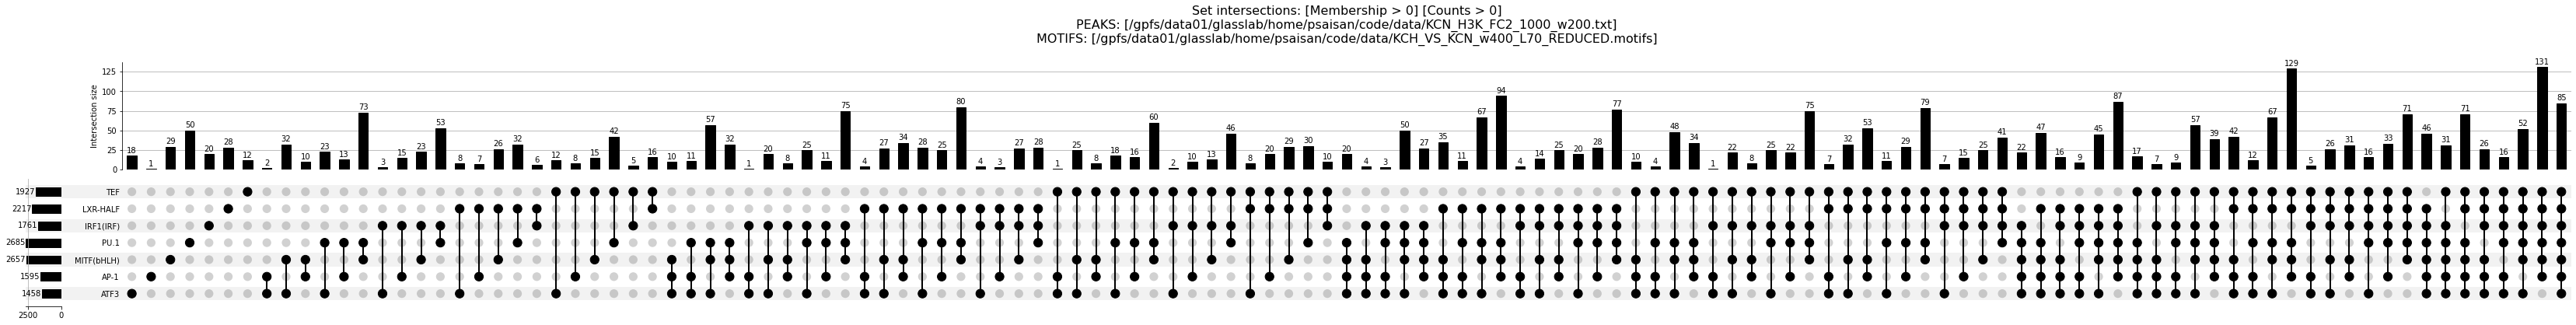

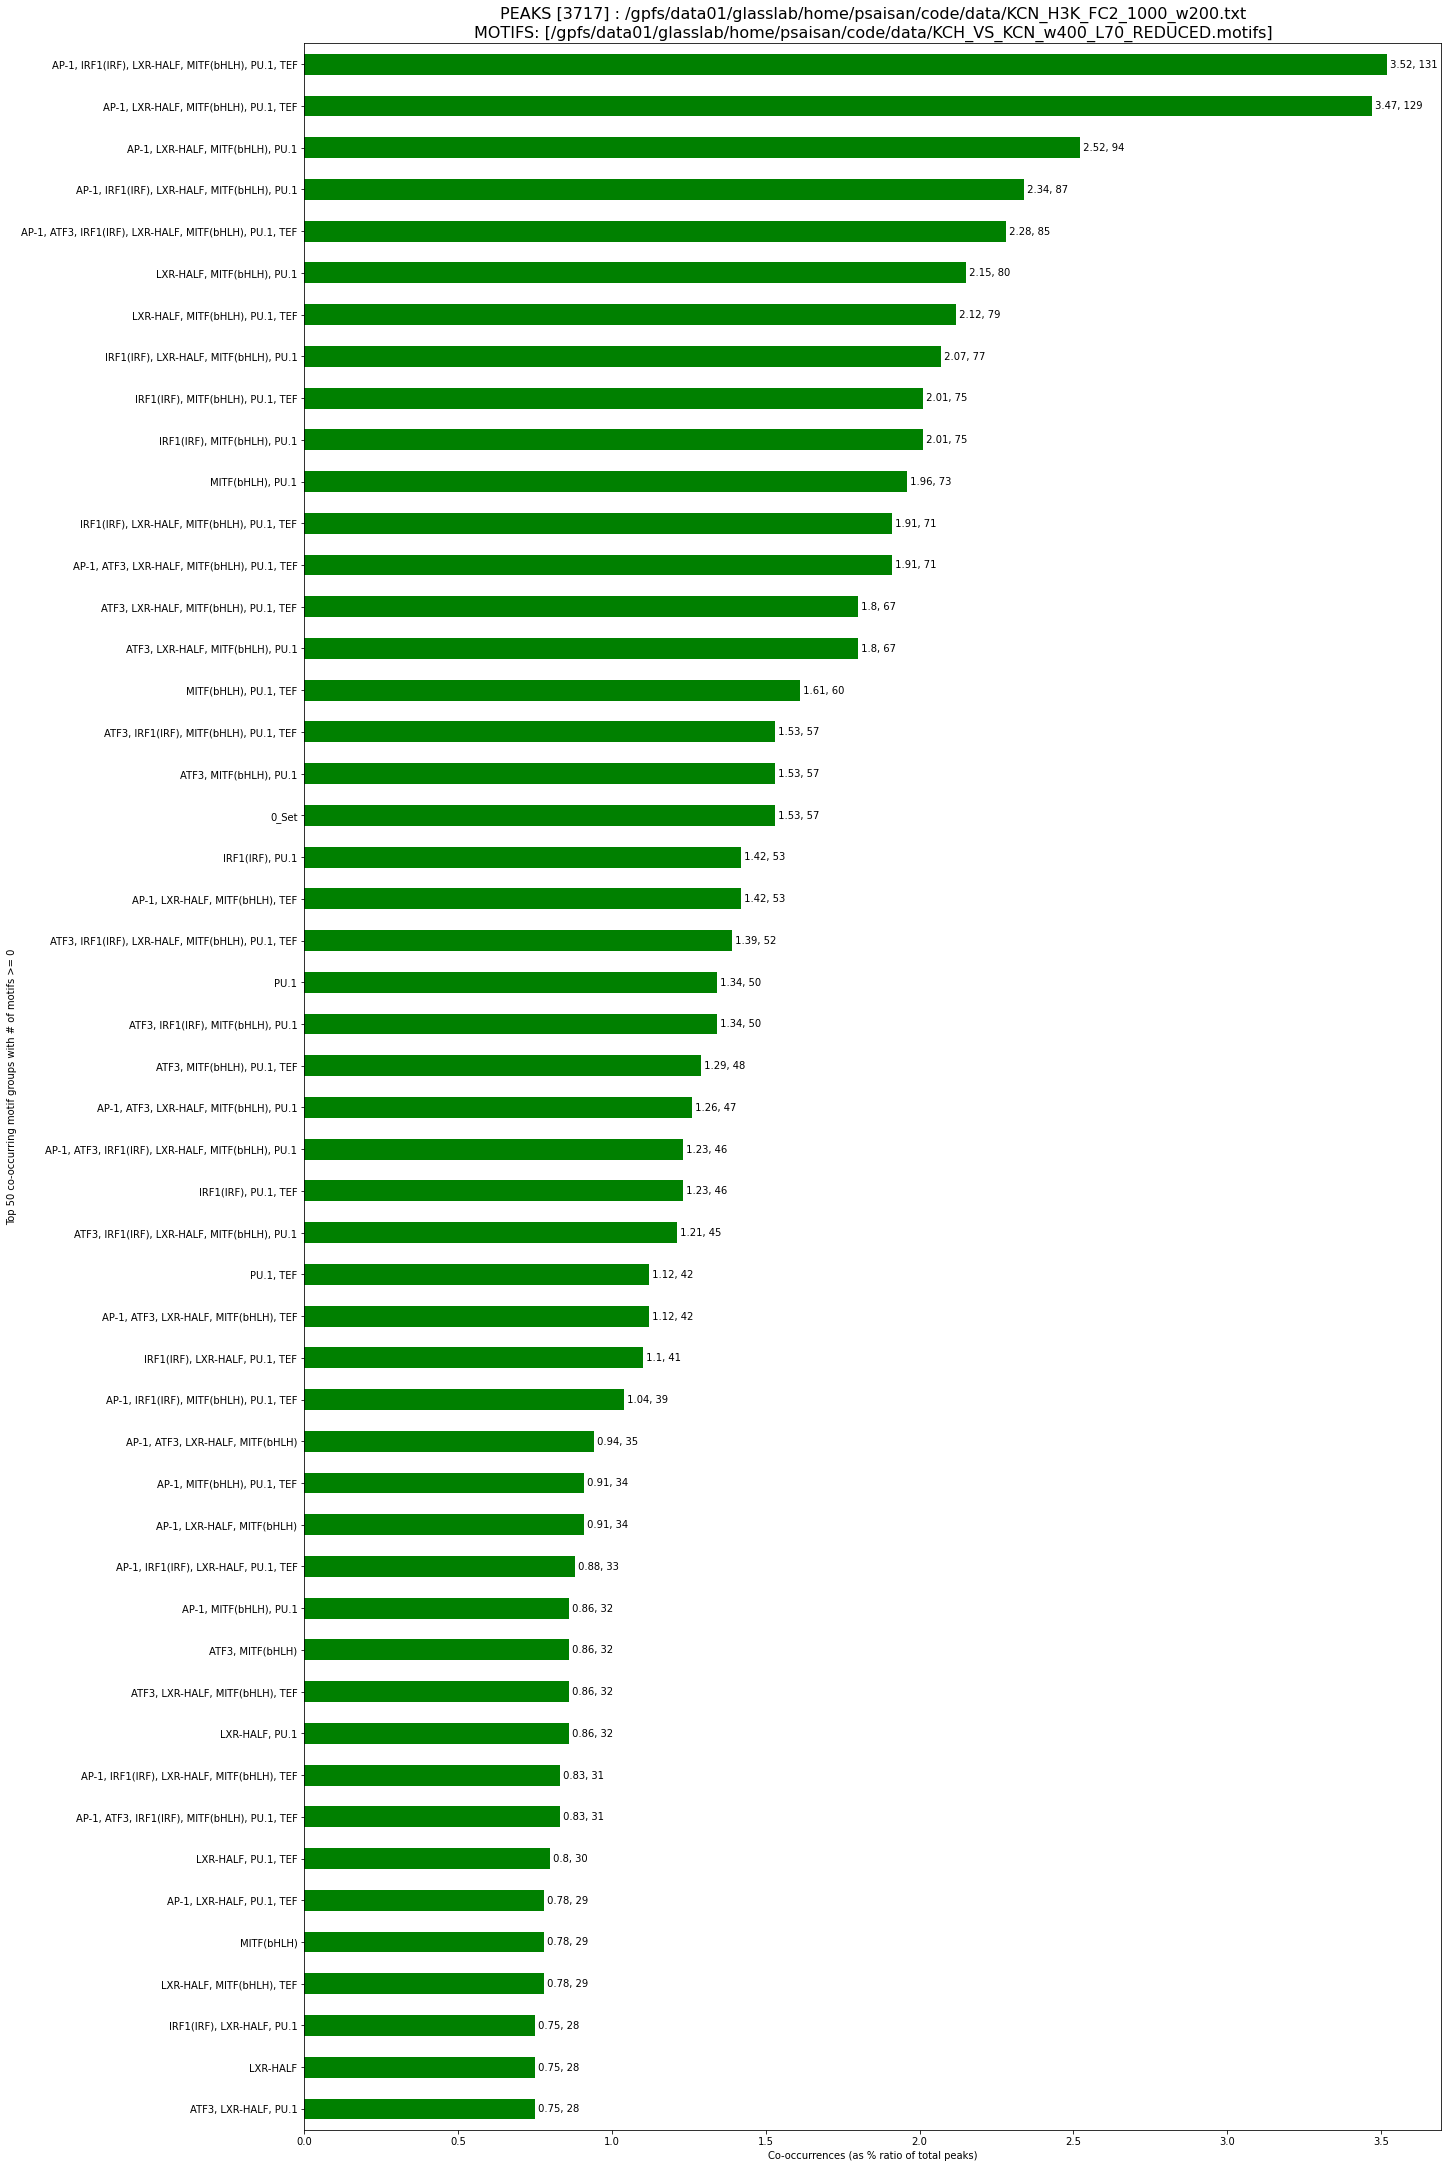

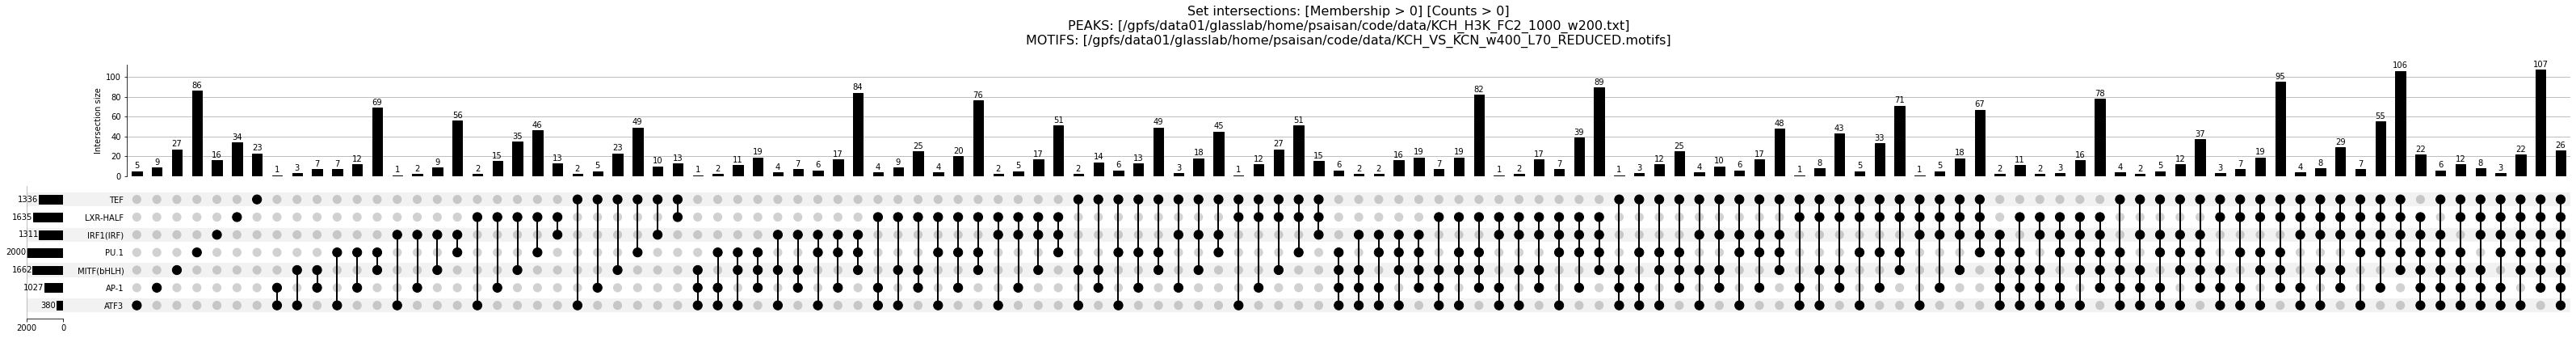

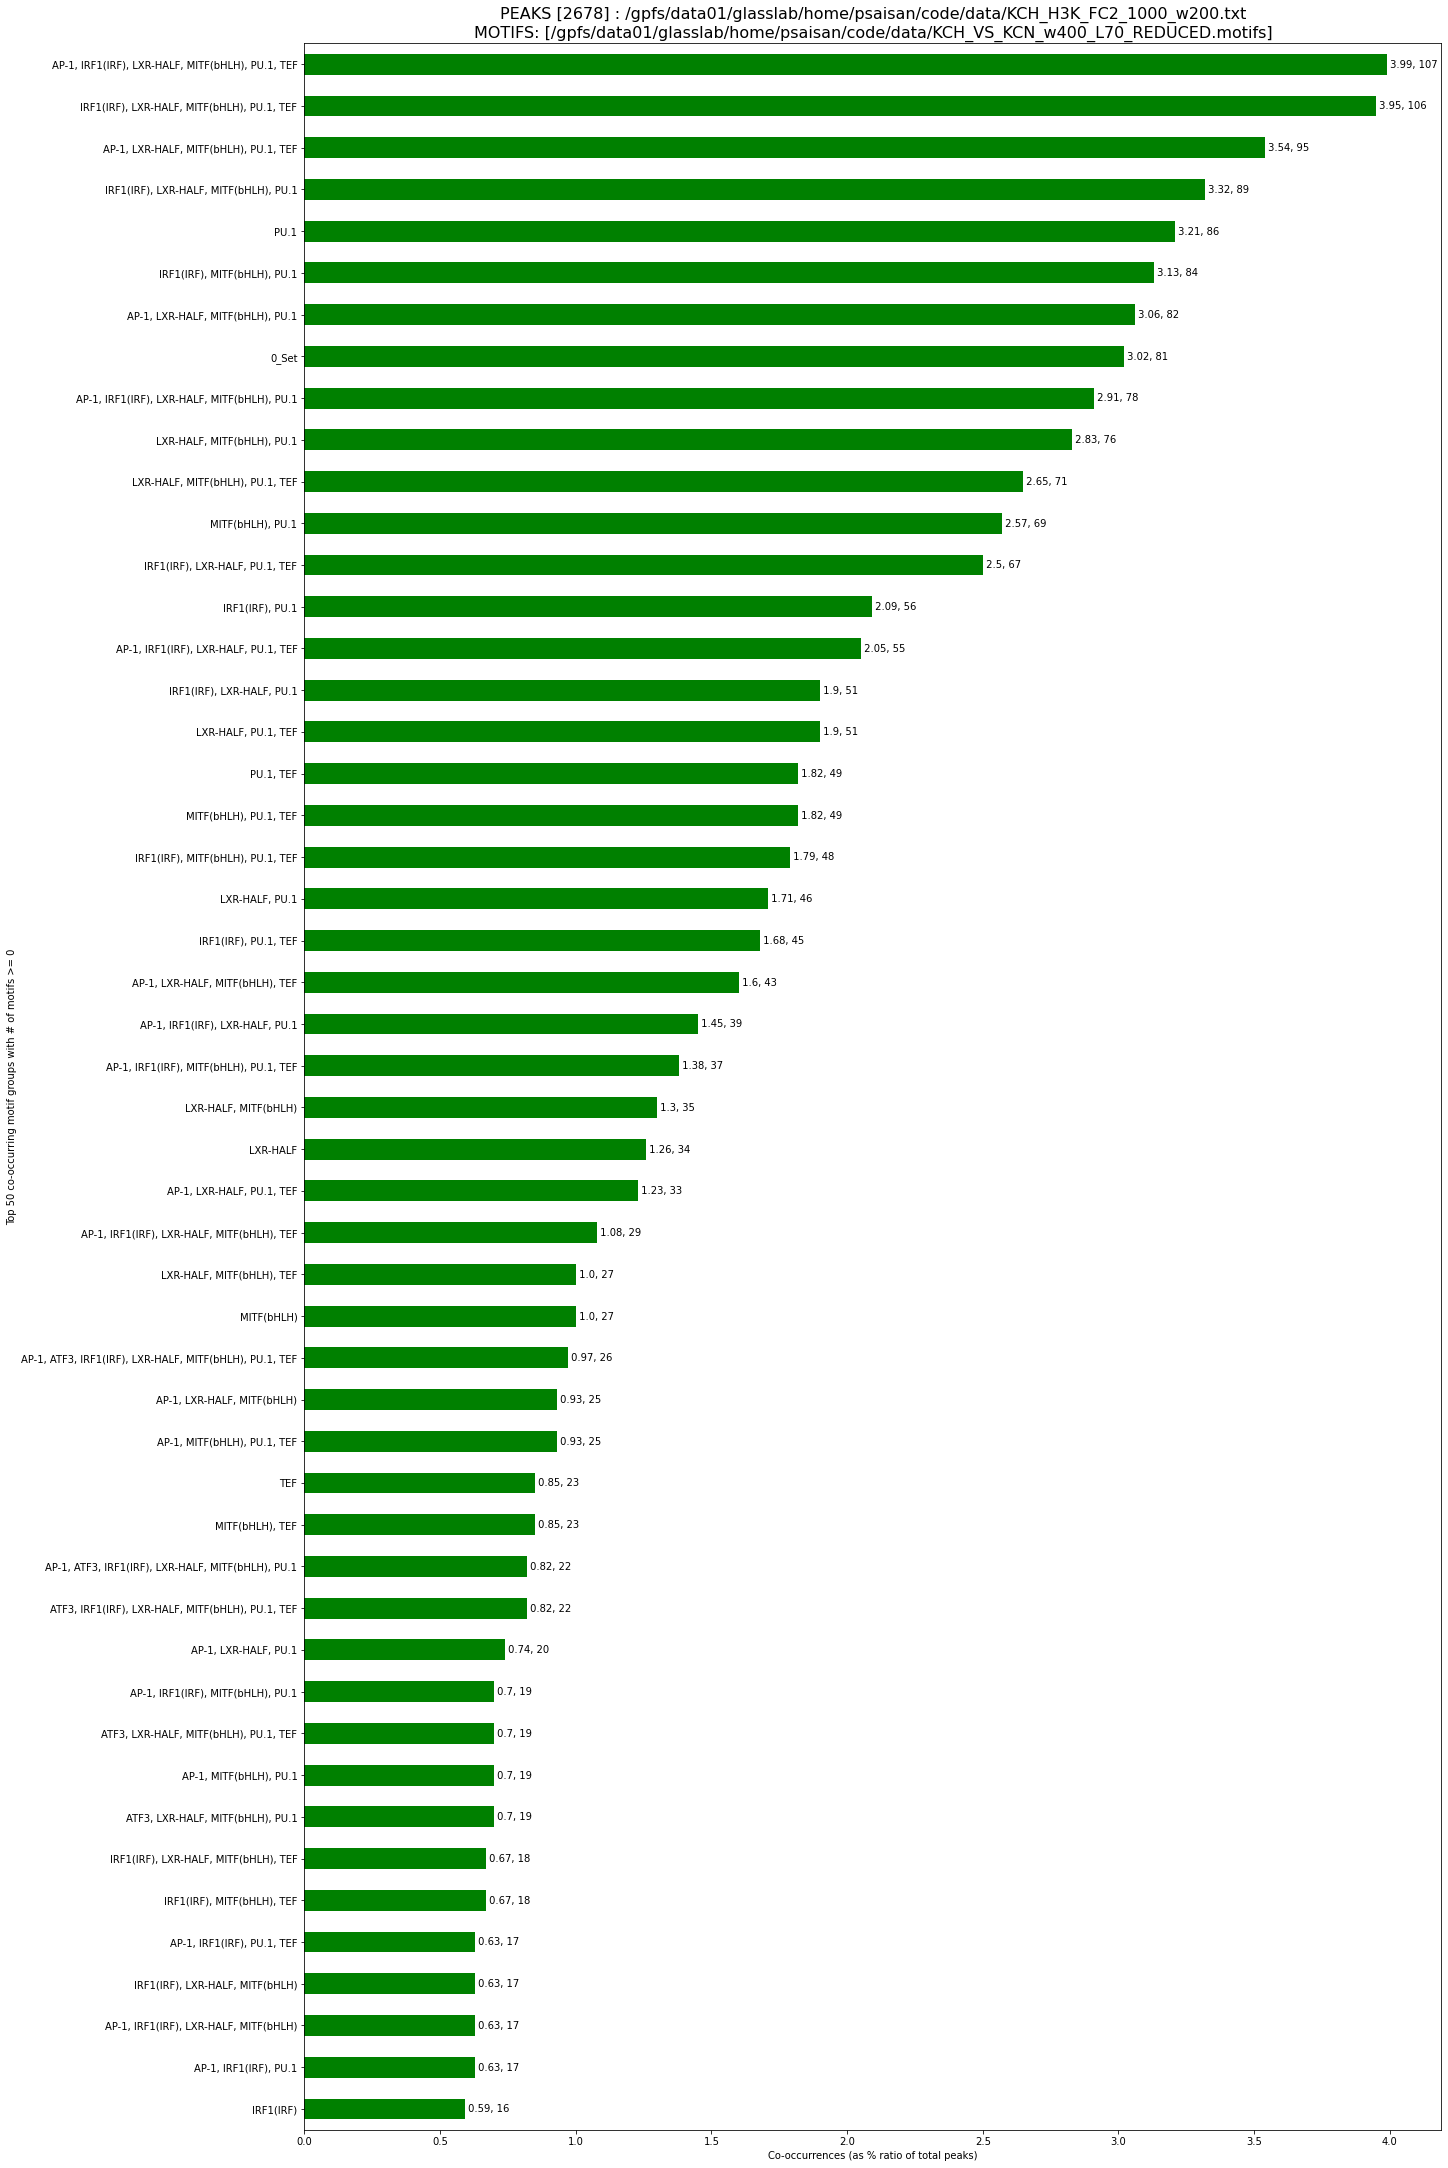

In [10]:
from upsetplot import plot
import matplotlib.pyplot as plt
import os
import pandas as pd

# -------------------------
# Configuration and Setup
# -------------------------

# Base directory path for data and outputs
cwd= os.getcwd()
base_dir_in=cwd+'/data/'
base_dir_out=cwd+'/results/'


# Genome reference
GENOME = 'mm10'

# Motif list file path
motif_list_file = os.path.join(base_dir_in, 'KCH_VS_KCN_w400_L70_REDUCED.motifs')

# Peak files
peak_file1 = os.path.join(base_dir_in, 'KCN_H3K_FC2_1000_w200.txt')
peak_file2 = os.path.join(base_dir_in, 'KCH_H3K_FC2_1000_w200.txt')

# Output directories
output_directory1 = os.path.join(base_dir_out, 'Example_Peak1/')
output_directory2 = os.path.join(base_dir_out, 'Example_Peak2/')

# CSV output paths for Peak 1 and 2
csv_out_file1 = os.path.join(base_dir_out, 'Peak1_table.txt')
csv_out_file2 = os.path.join(base_dir_out, 'Peak2_table.txt')

# Image output base paths
fig_output_path1 = os.path.join(base_dir_out, 'Peak1.png')  # Function appends _upset.png and _bar.png
fig_output_path2 = os.path.join(base_dir_out, 'Peak2.png')  # Function appends _upset.png and _bar.png


# Parameters with default values
motif_recount = True
seperate_duplicates = False
min_motif_set_count = 0
min_subset_count = 0
subset_motifs=['PU.1']

# -------------------------
# Processing Peak File 1
# -------------------------

# Call the peak_motif_sets function with appropriate parameters
dp1, bdf1 = peak_motif_sets(
    peak_file=peak_file1,
    genome=GENOME,
    motif_list_file=motif_list_file,
    Motif_recount=motif_recount,
    seperate_duplicates=seperate_duplicates,
    min_motif_set_count=min_motif_set_count,
    min_subset_count=min_subset_count,
    output_file=fig_output_path1
)

 

# Save the binary table to a CSV file for Peak 1
print('Save results in :',csv_out_file1)
bdf1.to_csv(csv_out_file1, sep='\t')

# -------------------------
# Processing Peak File 2
# -------------------------

# Call the peak_motif_sets function with appropriate parameters
dp2, bdf2 = peak_motif_sets(
    peak_file=peak_file2,
    genome=GENOME,
    motif_list_file=motif_list_file,
    Motif_recount=motif_recount,
    seperate_duplicates=seperate_duplicates,
    min_motif_set_count=min_motif_set_count,
    min_subset_count=min_subset_count,
    output_file=fig_output_path2
)


# Save the binary table to a CSV file for Peak 2
print('Save results in :',csv_out_file2)
bdf2.to_csv(csv_out_file2, sep='\t')


In [11]:
# Inspect results: motif combinations table
print('===')
print('Motif co-occurance counts (normalized %) for '+peak_file1)
print('===')
print(dp1)

print('===')
print('Outuput File : ',csv_out_file1)
print('===')
display(pd.read_csv(csv_out_file1,delimiter='\t'))


===
Motif co-occurance counts (normalized %) for /gpfs/data01/glasslab/home/psaisan/code/data/KCN_H3K_FC2_1000_w200.txt
===
ATF3, LXR-HALF, PU.1                                      0.75
LXR-HALF                                                  0.75
IRF1(IRF), LXR-HALF, PU.1                                 0.75
LXR-HALF, MITF(bHLH), TEF                                 0.78
MITF(bHLH)                                                0.78
AP-1, LXR-HALF, PU.1, TEF                                 0.78
LXR-HALF, PU.1, TEF                                       0.80
AP-1, ATF3, IRF1(IRF), MITF(bHLH), PU.1, TEF              0.83
AP-1, IRF1(IRF), LXR-HALF, MITF(bHLH), TEF                0.83
LXR-HALF, PU.1                                            0.86
ATF3, LXR-HALF, MITF(bHLH), TEF                           0.86
ATF3, MITF(bHLH)                                          0.86
AP-1, MITF(bHLH), PU.1                                    0.86
AP-1, IRF1(IRF), LXR-HALF, PU.1, TEF                     

,PeakID,ATF3,AP-1,MITF(bHLH),PU.1,IRF1(IRF),LXR-HALF,TEF
0,Merged-chrUn_GL456389-10653-2,0,1,1,0,1,0,0
1,Merged-chr9-35305408-2,0,1,0,0,1,0,1
2,Merged-chr14-19417842-2,0,1,0,1,1,0,1
3,Merged-chr2-134644199-2,0,0,1,0,0,1,1
4,Merged-chr9-3002152-2,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
3712,Merged-chr1-191184804-1,0,0,1,1,0,0,1
3713,Merged-chr9-47716358-1,1,0,1,0,1,1,1
3714,Merged-chr8-126588056-1,0,1,1,0,0,1,0
3715,Merged-chr6-38691611-1,0,0,1,1,1,1,0
